<a href="https://colab.research.google.com/github/itchyfeet-patient/kaggle-transcription/blob/master/your_first_NLP_competition_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification step by step
Natural Language Processing(NLP) is a subfield of computer science, artificial intelligence, information engineering, and human-computer interaction. This field focuses on how to program computers to process and analyze large amounts of natural language data. It is difficult to perform as the process of reading and understanding languages is far more complex than it seems at first glance.


# Objective
Goal of this kernel are the following:
* Basic Exploratory Data Analysis.
* Beginners guide to clean the dataset.
* Feature Anaysis & extraction
* Modeling And evaluation metrics
* submitting the results

# Table of content
## Introduction
* About Data
## Load and Check Data
* Importing Library
* Load Dataset
## Exploratory Data Analysis
* Target variable distribution
* Exploratory analysis of tweets
* Exploratory analysis of Other variables
## Data Preparation
* Data cleaning
* Removing STOP Words
* Tokenizing
* Stemming
* LEmmatization
* Splittoing the data
## Feature Extraction
* Bag of words
* Tf-idf Vectorizer
* reduce the dimensionality of the Matrix
## Model Training 
* MultinomialNB


# Introduction
## About Data
* What files do In need?
You'll need train.csv, test.csv and sample_sumbmission.csv.
* What should I expect the data format to be?
Each sample in the train and test set has the following information:
1. The text of a tweet
2. A keyword from that tweet(although this may be black!)
3. The location the tweet was sent from(may also be blank)
* What am I predicting?
You are predicting whether a given tweet is about a real disaster or not.
If so, predict a 1. If not, predict a 0.
* Files
1. train.csv - the training set
2. test.csv - the test set
3. sample_submission.csv - a sample submission file in the correct format


## The columns in this dataset are:
* id - a unique identifier for each tweet
* text - the text of the tweet
* location - the location the tweet was sent from (may be blank)
* keyword - a particular keyword from the tweet (may be blank)
* target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


# Load and Check Data
## Import Libraries

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk.stem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nltk.stem (from versions: none)
ERROR: No matching distribution found for nltk.stem


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g  pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/kaggle/kaggle_2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import re # regex applies a regular expression to a string and returns the matching substrings.
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import BlanklineTokenizer
nltk.download('all') # 모든 패키지 다운로드 경우
from nltk.stem import WordNetLemmatizer
import string
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
import scikitplot as skplt
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from multiprocessing import Pool

/content/drive/MyDrive/dataset/kaggle/kaggle_2/test.csv
/content/drive/MyDrive/dataset/kaggle/kaggle_2/train.csv


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

증맬많당~

# Import Dataset

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle_2/train.csv')
test_data  = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle_2/test.csv')

In [ ]:
train_data.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


id, keyword, location, text, target으로 이루어진 데이터네요 

In [ ]:
print('There are {} rows and {} columns in train'.format(train_data.shape[0], train_data.shape[1]))
print('There are {} rows and {} columns in test'.format(test_data.shape[0], test_data.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


train (7613,5) test (3263,4)

In [ ]:
train_data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
# Let's display one the tweets existed in the text column
train_data['text'][11]

'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding'

# Exploratory Data Analysis
## Target variable distribution
Before we begin with anything else,let's check the class distribution. There are only two classes 0 and 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'samples')

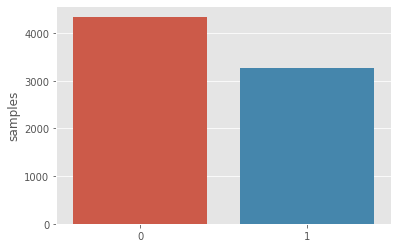

In [ ]:
x=train_data.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

train데이터에서 타겟 값의 분포 비율을 따져봤어용 재난트윗이 아닌게 더 많네요`

## Exploratory analysis of tweets
First, we will do very basic analysis, that is character level, word level and sentence level analysis.

Number of characters in tweets

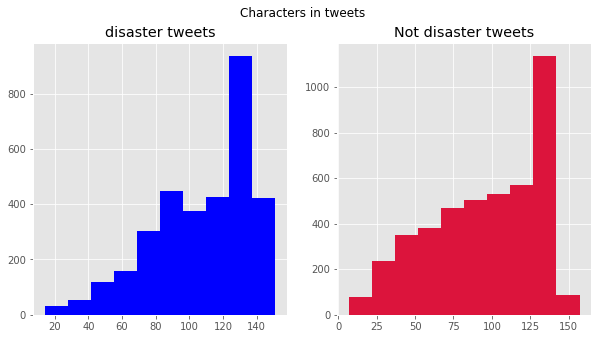

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = train_data[train_data['target']==1]['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.len()
ax2.hist(tweet_len, color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

The distribution of both seems to be almost same. 120 to 140 chacters in a tweet are the most common among both.

Number of words in a tweet

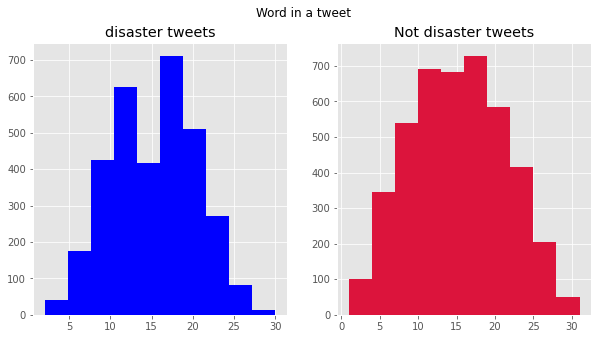

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
tweet_len = train_data[train_data['target']==1]['text'].str.split().map(lambda x : len(x))
# str를 붙여줘야댐 판다스에서는
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')
tweet_len=train_data[train_data['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='CRIMSON')
ax2.set_title('Not disaster tweets')
fig.suptitle('Word in a tweet')
plt.show()

Average word length in a tweet

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

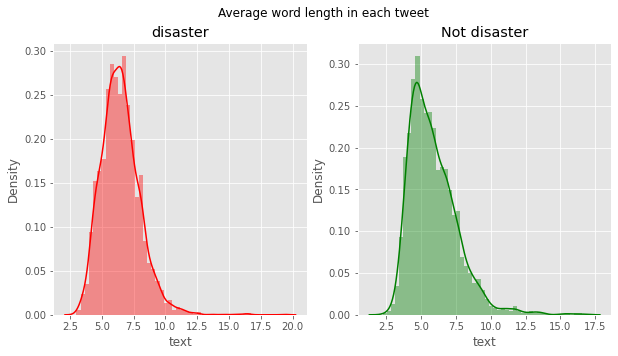

In [ ]:
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_data[train_data['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax1, color='red')
ax1.set_title('disaster')
word=train_data[train_data['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x : np.mean(x)), ax=ax2, color = 'green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

**Frequencies**  
Now we want to count the frequency of each word in out corpus.

In [ ]:
corpus=[]

for x in train_data['text'].str.split():
    for i in x :
        corpus.append(i)

In [ ]:
corpus


['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all',
 'Forest',
 'fire',
 'near',
 'La',
 'Ronge',
 'Sask.',
 'Canada',
 'All',
 'residents',
 'asked',
 'to',
 "'shelter",
 'in',
 "place'",
 'are',
 'being',
 'notified',
 'by',
 'officers.',
 'No',
 'other',
 'evacuation',
 'or',
 'shelter',
 'in',
 'place',
 'orders',
 'are',
 'expected',
 '13,000',
 'people',
 'receive',
 '#wildfires',
 'evacuation',
 'orders',
 'in',
 'California',
 'Just',
 'got',
 'sent',
 'this',
 'photo',
 'from',
 'Ruby',
 '#Alaska',
 'as',
 'smoke',
 'from',
 '#wildfires',
 'pours',
 'into',
 'a',
 'school',
 '#RockyFire',
 'Update',
 '=>',
 'California',
 'Hwy.',
 '20',
 'closed',
 'in',
 'both',
 'directions',
 'due',
 'to',
 'Lake',
 'County',
 'fire',
 '-',
 '#CAfire',
 '#wildfires',
 '#flood',
 '#disaster',
 'Heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'of',
 'streets',
 'in',
 'Manitou,',
 'Colorado',
 'Springs',
 'areas',
 "I'm

train데이터를 단어로 쪼개서 corpus에 담아줌니당

담아준  corpus에서 하나씩 단어를 꺼내가지고는 불용어인지 검사해서 아니면 사전에 추가를 해버링니당  
top에다가 딕셔너리의 아이템들을 꺼내가지구 key(첫번째 데이터를 기준으로 정렬합니당)  
그러면 top에 들어있는 것들을 unpack(*)해서 x,y에 담아준다.  


<BarContainer object of 30 artists>

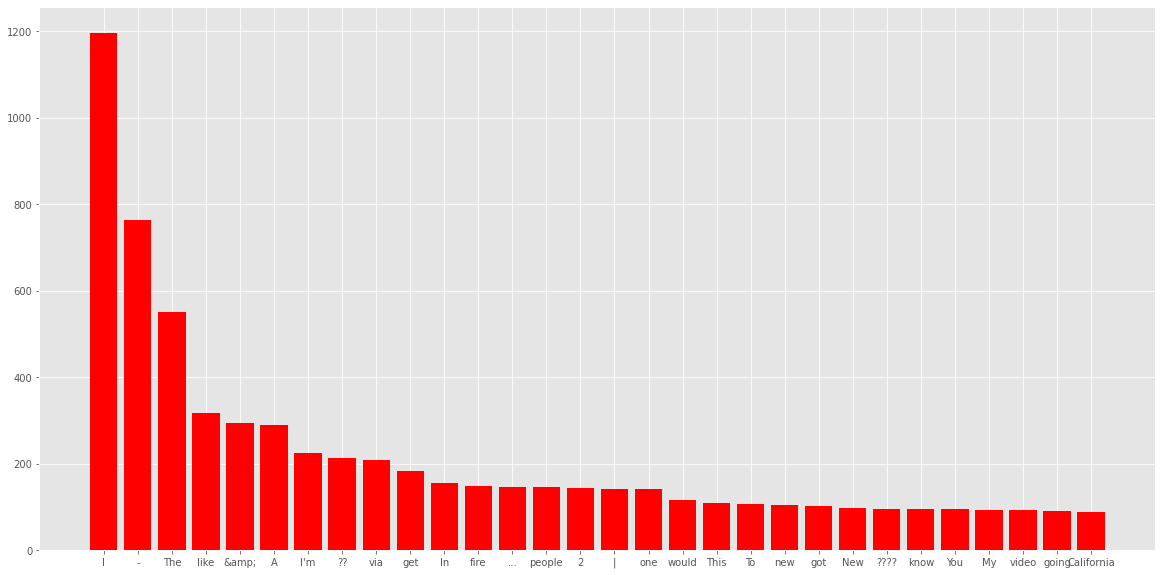

In [ ]:
dic=defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word]+=1
# 튜플로 반환된 데이터를 받아오쟌아
top=sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30]

x, y = zip(*top)
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x,y,color='red')

불용어 아닌 단어들 순위

<BarContainer object of 30 artists>

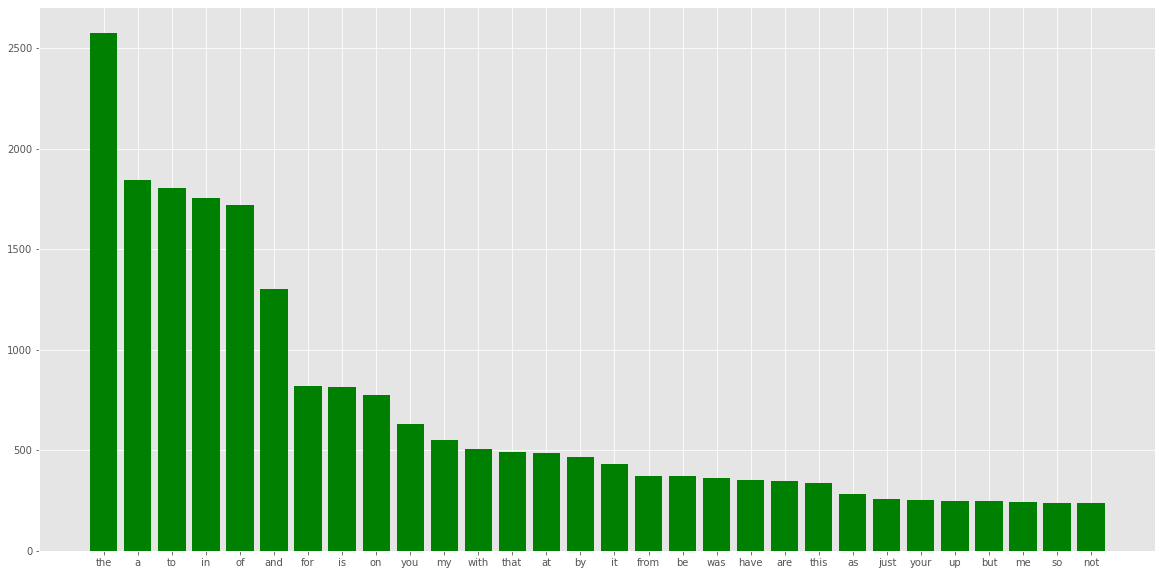

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top = sorted(dic.items(), key=lambda x : x[1], reverse=True)[:30]

x, y = zip(*top)
plt.rcParams["figure.figsize"] = (20, 10)
# There is also this workaround in cas you want to change the size without using the figure environment.
# So in case you are using plt.plot() for example, you can set a tuple with width and height.
plt.bar(x, y , color='green')

불용어인 단어들 순위

Let's take a look to the punctuation in our tweets:

구두점을 함 보겠습니다.....

<BarContainer object of 23 artists>

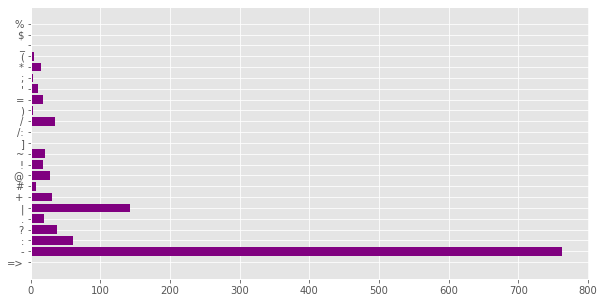

In [ ]:
plt.figure(figsize=(10,5))
import string
dic=defaultdict(int)
special=string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
    
x, y = zip(*dic.items())
plt.barh(x,y,color='purple')

In details about each target

target이 0인 트레인 데이터에서 공백으로 나눠서 단어를 자르고 소문자로 바꿈.  
counter 함수를 사용해서 숫자세줌

In [ ]:
from collections import Counter

words=train_data[train_data.target==0].text.apply(lambda x : [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1877), ('a', 1238), ('to', 1181), ('i', 1052), ('and', 911), ('of', 895), ('in', 805), ('you', 625), ('is', 586), ('my', 541), ('for', 486), ('on', 424), ('with', 374), ('-', 374), ('that', 357), ('it', 341), ('this', 286), ('be', 284), ('like', 250), ('have', 240), ('by', 240), ('so', 235), ('are', 231), ('at', 229), ('just', 229), ('your', 225), ('me', 221), ('was', 216), ('but', 216), ('not', 198), ("i'm", 195), ('&amp;', 190), ('??', 183), ('out', 179), ('up', 178), ('will', 177), ('if', 177), ('from', 177), ('all', 173), ('new', 163), ('get', 161), ('as', 160), ('or', 155), ('we', 148), ('when', 144), ('has', 143), ('he', 143), ('no', 140), ('about', 139), ('they', 133)]


the가 제일많네용

target이 1인경우로 똑같이해봅니다

In [ ]:
words = train_data[train_data.target==1].text.apply(lambda x: [word.lower() for word in x.split()])
h_words = Counter()

for text_ in words:
    h_words.update(text_)

print(h_words.most_common(50))

[('the', 1330), ('in', 1144), ('of', 919), ('a', 897), ('to', 753), ('and', 494), ('on', 410), ('for', 394), ('-', 389), ('is', 344), ('at', 303), ('i', 284), ('by', 274), ('from', 243), ('with', 188), ('that', 181), ('after', 181), ('this', 177), ('as', 167), ('are', 166), ('was', 165), ('it', 163), ('fire', 151), ('have', 140), ('my', 130), ('over', 123), ('you', 121), ('more', 121), ('via', 117), ('up', 114), ('an', 113), ('be', 112), ('...', 106), ('&amp;', 105), ('has', 104), ('suicide', 103), ('who', 100), ('no', 99), ('disaster', 97), ('but', 95), ('police', 94), ('people', 93), ('been', 93), ('when', 93), ('killed', 92), ('like', 91), ('not', 90), ('california', 88), ('than', 85), ('just', 84)]


뒤쪽으로 갈수록 타겟 레이블이 1인지 0인지의 차이가 확명해집니다.

# Exploratory analysis of Other variables
## Keyword and Location
1. Missing Values

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set 33% of location is missing in both training and test set Since missing value ratios between training and test set are too close, they are most probably taken from the sam sample. Missing values in those features are filled with no_keyword and no_location respectively.


missing_col을 키워드와 로케이션으로 두고,,  
missing_cols에 널 값이 있는 개수를 다 더해가지구

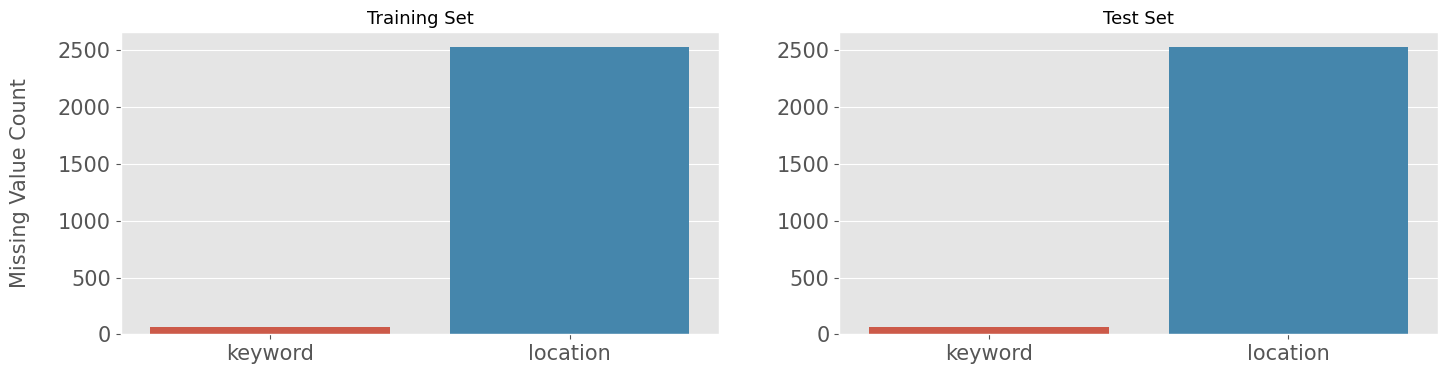

In [ ]:
missing_cols = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(17,4), dpi=100)

sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[0])
sns.barplot(x=train_data[missing_cols].isnull().sum().index, y=train_data[missing_cols].isnull().sum().values, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()


for df in [train_data, test_data]:
    for col in ['keyword','location']:
        df[col] = df[col].fillna(f'no_{col}')

training set이나 test set이나 개수는 별 차이가 없네용

1. Cardinality(중복도) and Target Distribution 
Locations are not automatically generated, they are user inputs. That's why location is very dirty and there are too many unique values in it. It shouldn't be used as a feature.  

Fortunately, there is signal in keyword because some of those words can only be used in one context. Keywords have very different tweet counts and target means. Keyword can be used as a feature by itself or as a word added to the text. Every single keyword in training set exists in test set. If training and test set are from the same sample, It is also possible to use target encoding on keyword.

위치 너무 쓰기 힘든값

In [ ]:
print(f'Number of unique values in keyword = {train_data["keyword"].nunique()} (Training) - {test_data["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {train_data["location"].nunique()} (Training) - {test_data["location"].nunique()}(Test)')

Number of unique values in keyword = 222 (Training) - 222 (Test)
Number of unique values in location = 3342 (Training) - 1603(Test)


키워드 고유값 개수와 로케이션 고유값 개수를 뽑아봤어요  
로케이션 너무 많아요

0,1 target 레이블 별로 키워드의 분포를 나타내는 그래프를 그렸습니다.  
키워드가 굉장히 많은데도 불구하고 이런식으로 그래프를 그리니 한 눈에 들어오긴 하네요

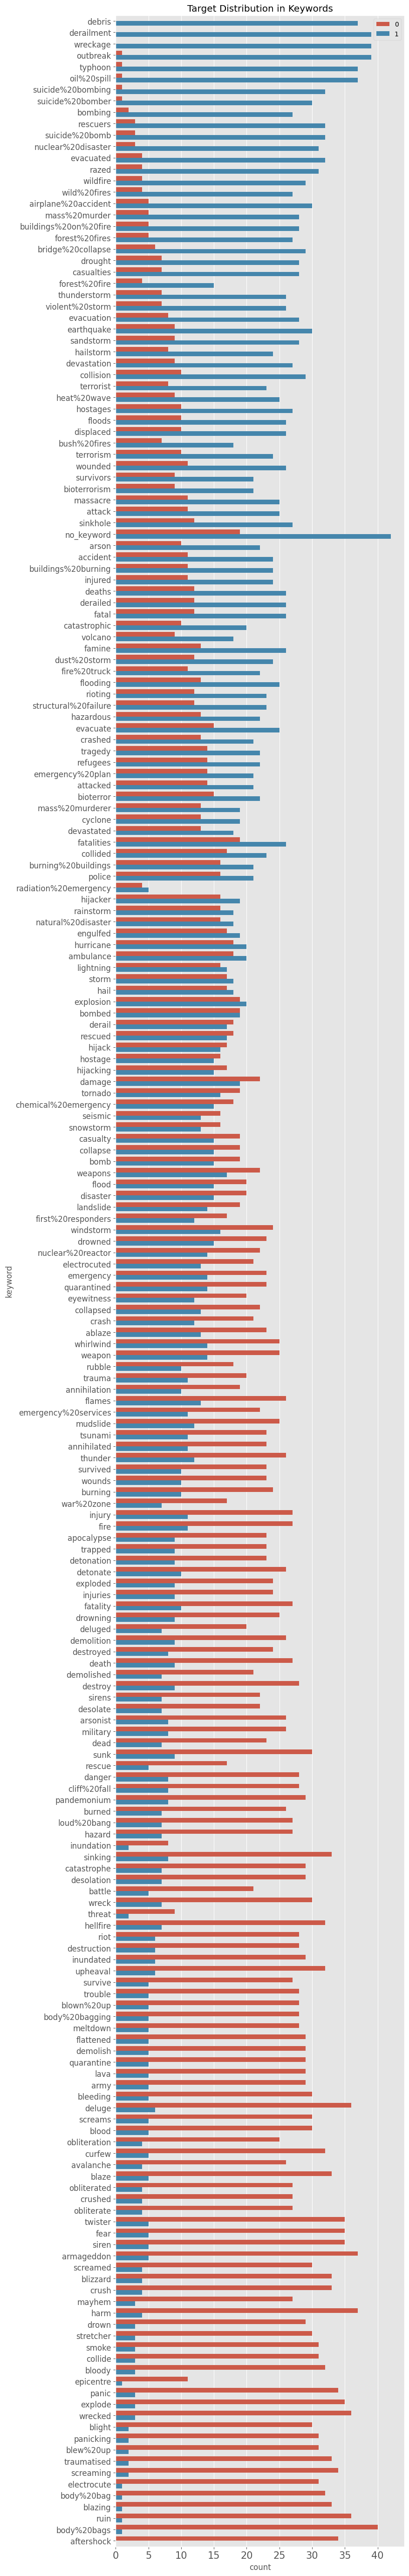

In [ ]:
train_data['target_mean'] = train_data.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8,72), dpi=100)

sns.countplot(y=train_data.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_data.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()
train_data.drop(columns=['target_mean'], inplace=True)

# Hashtag Analysis
# Small analysis done ont he hashtags, to check It's possible discriminator '#Capability for this task.
The regular expression

above is meant ot find any four digits at the beginning of a string, which suffices for our case. The above is a raw string (meaning that a backslash is no longer an escape character), which is standard practice with regular expressions. Regex = r'^(\d{4})'

문자열 시작부분에서 4자리 숫자를 찾고싶은거래요.

In [ ]:
def clean_text(df, text_field, new_text_field_name):
    # 기준 데이터프레임, text_field의 컬럼명, 새롭게 만든 컬럼이름이에요

    df[new_text_field_name] = df[text_field].str.lower()
    # convert strings in the series/index to lowercase.
    # text필드의 문자를 모두 소문자로 바꿔줍니다.

    #remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem : re.sub(r"\d+", "", elem))
    # 숫자반복되면 ""으로 바꿔라.

    # remove url
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem : re.sub(r"http://\S+|www\.\S+", "", elem))
    # 공백 문자가 아닌 문자가 http://다음에 반복되거나 (or) www.다음에 반복되면, ""으로 대체

    # remove HTML tags
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem : re.sub(r"<.*?>", "", elem))
    # <> 내에있는 문자까지 ""로 대체
    # remove emojis
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"["
                                                                                u"\U0001F600-\U0001F64F"  # emoticons
                                                                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                                                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                                                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                                                                u"\U00002702-\U000027B0"
                                                                                u"\U000024C2-\U0001F251"
                                                                                "]+", "", elem))
    # 이건 유니코드로 지우는거인듯
    
    return df

data_clean = clean_text(train_data, 'text', 'text_clean')
data_clean_test = clean_text(test_data, 'text', 'text_clean')
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


text_clean을 한번 보면 숫자 없고 .. 일단 보이는 부분에서는 그렇습니다

# Removing stop words

**What are stop words?**
stopwords : A stopwoard is a commonly used word (such as "the", "a", "an", "in") that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory.
home/pratima/nltk_data/corpora/stopwrds is the directory address.(Do not forget to change your home directory name)

검색 엔진에서는 불용어를 애초에 무시하도록 프로그래밍 되어 있다고 하네요. 처음암

nltk에 있는 stopwords를 사용합니다. 영문버전~

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,id,keyword,location,text,target,text_clean
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...


# Tokenizing
Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph

토큰화 해줍니다.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ..."


# Stemming


In [ ]:
# stemming
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("stemming for {} is {}".format(w,porter_stemmer.stem(w)))

stemming for studies is studi
stemming for studying is studi
stemming for cries is cri
stemming for cry is cri


기본형으로 바꾸려고 노력중인 stemmer..

In [ ]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))
    

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


lemmatization이 더 성능이 좋습니다. stemming은 철자가 훼손된 어간을 추출해줍니다.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquak, may, allah, forgi..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, rong, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, place, ', notifi, offic..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, peopl, receiv, #, wildfir, evacu, order, c..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, rubi, #, alaska, smoke, #, ..."


stemming된거 담아줍니다`

# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['text_clean_tokens'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,id,keyword,location,text,target,text_clean,text_tokens,text_clean_tokens
0,1,no_keyword,no_location,Our Deeds are the Reason of this #earthquake M...,1,deeds reason #earthquake may allah forgive us,"[deeds, reason, #, earthquake, may, allah, for...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,no_keyword,no_location,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,no_keyword,no_location,All residents asked to 'shelter in place' are ...,1,residents asked 'shelter place' notified offic...,"[residents, asked, 'shelter, place, ', notifie...","[resident, asked, 'shelter, place, ', notified..."
3,6,no_keyword,no_location,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ...","[,, people, receive, #, wildfires, evacuation,...","[,, people, receive, #, wildfire, evacuation, ..."
4,7,no_keyword,no_location,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby #alaska smoke #wildfires p...,"[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


왜같은데담는거임? 덮어써지는거아닌가`

In [ ]:
"""!pip3 install pyspellchecker==20.2.2
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: correct_spellings(x))""" 

>Why is Lemmtization better than Stemming?  
Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word.
(왜 어간추출이 구린가요?? 스테밍은 단어에서 접미사를 커팅하면서 작동하기 때문이에요. 넓은 의미에서 단어의 시작이나 끝을 잘라내버립니다)  

On the contrary, Lemamatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked int eh dictionary. Hence, lemmatization helps in formin better machine learning features.  
(그에 반해 표제어 추출은 더 강력한 연산으로 단어의 형태소 분석을 고려합니다.표제어를 반환하는겨 사전을 만들고 단어의 적절한 형태를 찾아서 반환하는 지능적인 작업이야 스테밍은 단순한 작업임.   
> If you look stemming for studies and studying, output is same(sudi) but lemmatizer provides different lemma for both tokens study for studies and studying for studying. So when we need to make feature set to train machine, it would be great if lemmatization is preferred.  
(studying와 studies는 studi라는 동일한 출력이 나올텐데, lammatization는 studying과 studies 모두에 대해 lemma를 제공함니다. 아무턴간에 lemma써라)

# Splitting the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_clean['text_clean'], 
                   
                                                    data_clean['target'], 
                                                    test_size = 0.2,
                                                    random_state = 10)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090,)
(1523,)
(6090,)
(1523,)


# Feature Extraction : tf-idf
## Bag of words
Vectorization is the general process of turning  collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.  
(벡터화는 텍스트 문서 꾸러미를 숫자 특징 벡터로 바꾸는 일반적인 프로세스입니다. 이 토큰화! 전략을 Bag of words 라고 합니다. 

빈도기반으로 벡터화를 하기 때문에 문맥을 고려하지 않는다는 단점이 있다.

## CountVectorizer
CountVectorizer converts a collection of text documents to a matrix of token counts: the occurrences of tokens in each documnet. This implementation produces a sparse representation of the counts.

텍스트 문서 모음을 토큰 수의 매트릭스로 변환~ 카운트으 희소 표현을 생성~

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns = vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,__,__ohhmyjoshh,__scrambledeggs,__srajapakse__,_animaladvocate,_ashj,_asianshawtyy,_bookofdaniel,_charleyisqueen,_dangdaddy,...,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Note that for each sentence in the corpus, the position tof the tokens(words in our case) is completely ignored. When constructing this bag-of-words representation, the defalut configuration tokenize the string by extracting words of at least 2 alphanumeric characters (punctuation is completely ignored and always treated as a token separator)

Consider only certain pattern We can also specify the desired pattern for our token using token_pattern argument. In the following example, we will only consider tokens consists of at least 3 alphabets.

In [ ]:
# Only alphabet, contains at least 3 letters 
vectorizer = CountVectorizer(analyzer='word', token_pattern= r'\b[a-zA-Z]{3,}\b', ngram_range=(1,1))
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), index=['sentence '+str(i) for i in range(1, 1+len(X_train))], columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,ztfeadgid,ztyzhbvzqp,zumiez,zvchjclf,zvhxiv,zvobmdxhgp,zvreffnyd,zxathetis,zzjkxwyu,zzzz
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ngram : n개의 단어를 묶묶

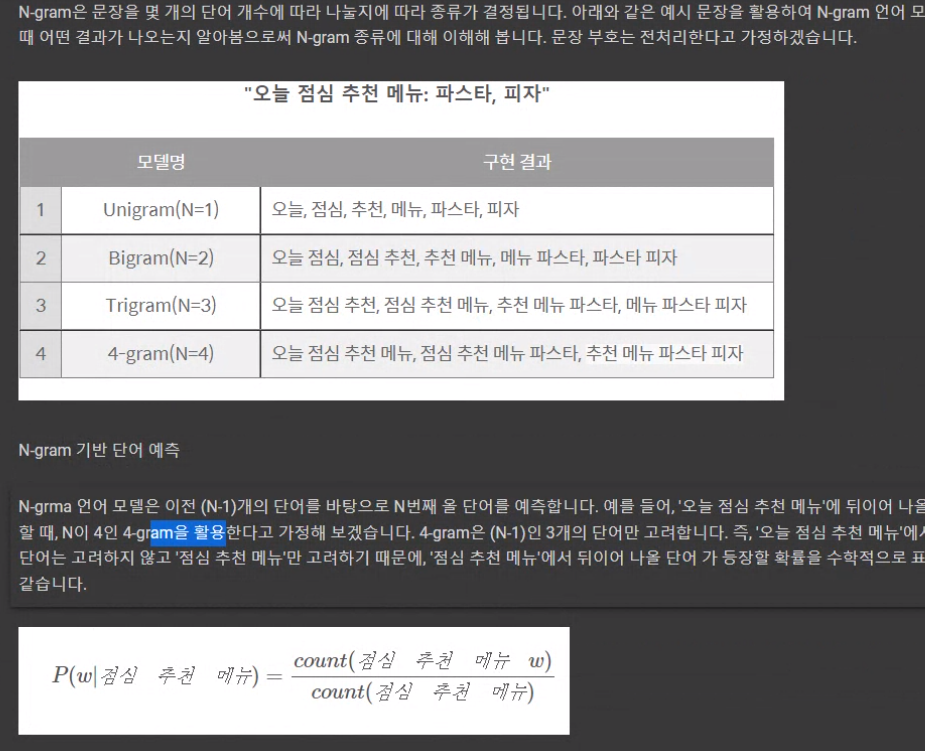

Note 1000, be, is, of are removed from the original feature space.  
Consider only unigrams/bigrams/...tokens
* ngram-range=(1,1) : unigram only
* ngram-range=(2,2) : bigrams only
* ngram-range=(1,2) : both unigrams and bigrams


In [ ]:
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(2, 2))  
# only bigrams
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa lemme,aaaaaaallll even,aaaaaand there,aan den,aannnnd reddit,aashiqui actress,aba woman,abandon plans,abandon west,abandoned aircraft,...,zoom one,zotar skeleton,zouma absolutely,zouma flattened,zourryart forgot,zqrsaqrrt news,zss sws,ztfeadgid via,zumiez location,zxathetis are
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Consider only tokens with certain frequency  
we can also make the vectorizer to ignore terms that have a document frequency strictly lower than a specified threshold by setting min_df = threshold or max_df = threshold for higher frequency terms.

한번만 나온 단어를 제외

In [ ]:
# consider both unigrams and bigrams, occur at least twice
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(1, 2),                                             min_df = 2)  
vectorized = vectorizer.fit_transform(X_train)
pd.DataFrame(vectorized.toarray(), 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aba,aba woman,abandon,abandoned,abandoned aircraft,abbott,abbswinston,abbswinston zionist,abc,abc news,...,zionist terrorist,zippednews,zombie,zombie apocalypse,zone,zone coming,zouma,zouma flattened,zss,zss sws
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 6089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


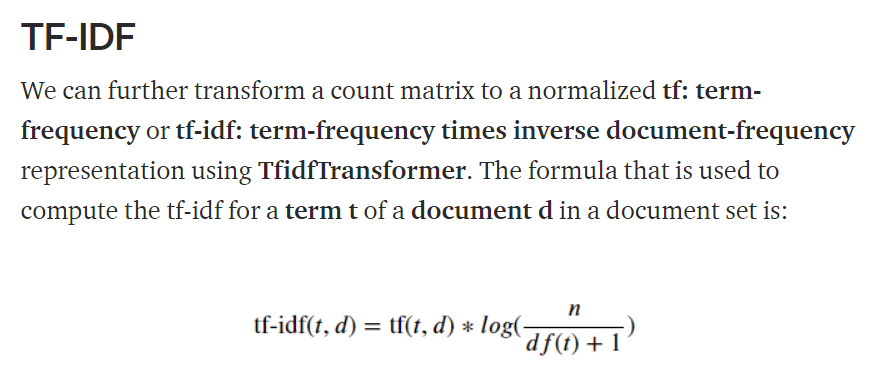

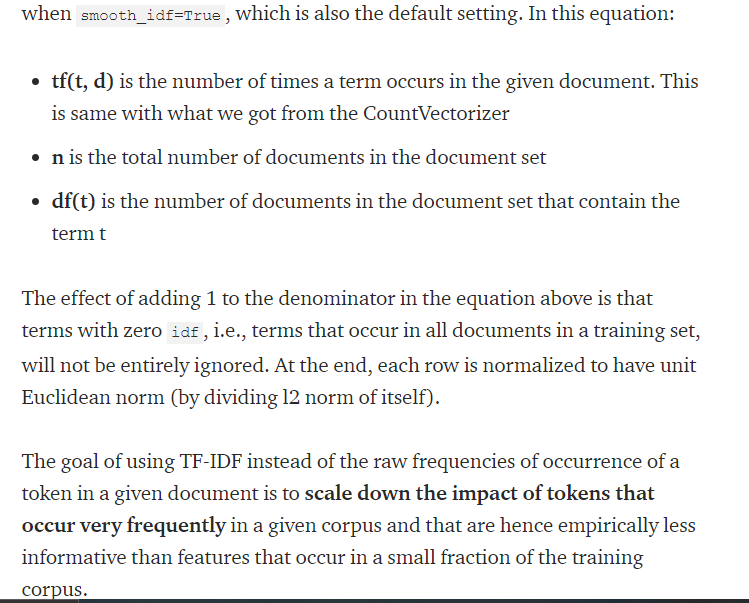

TfidfTransformer v.s. Tfidfvectorizer  
  
Both TfidfTransformer and Tfidfvectorizer modules can convert a collection of raw documents to a matrix of TF-IDF features. However,

1. With Tfidtransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency(IDF) Values and only then compute the TF-IDF scores.
2. With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and TF-IDF scores all using the same data set.

1. tfidtransformer 는 countvectorizer를 사용해서 단어 수를 체계적으로 계산한 다음 idf값을 계산하고 tf-idf 점수만 꼐산합니다.
2. 반대로 tfidvectorizer를 사용하면 한 번에 세 단계를 모두 수행합니다. 내부적으로 동일한 데이터 세트를 사용하여 단어 수 , idf, tf-idf점수를계산합니다.

tfidtransformer

In [ ]:
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)
vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b', # 공백사이 영문자들 3번 이상 반복 
                              ngram_range=(1, 1) 
                              )  
count_vectorized = vectorizer.fit_transform(X_train)
tfidf = TfidfTransformer(smooth_idf=True, use_idf=True)
train_features = tfidf.fit_transform(count_vectorized).toarray()

pd.DataFrame(train_features, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aal,aan,aannnnd,aashiqui,aba,abandon,...,ztfeadgid,ztyzhbvzqp,zumiez,zvchjclf,zvhxiv,zvobmdxhgp,zvreffnyd,zxathetis,zzjkxwyu,zzzz
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tfidvectorizer

In [ ]:
# Convert a collection of text documents to a matrix of token counts
tfidf=feature_extraction.text.TfidfVectorizer(encoding='utf-8',
                       ngram_range=(1,1),
                       max_features=5000,
                       norm='l2',
                       sublinear_tf=True)

In [ ]:
train_features = tfidf.fit_transform(X_train).toarray()

In [ ]:
print(train_features[1])
print(train_features.shape)

[0. 0. 0. ... 0. 0. 0.]
(6090, 5000)


In [ ]:
pd.DataFrame(train_features, 
             index=['sentence '+str(i) 
                    for i in range(1, 1+len(X_train))],
             columns=tfidf.get_feature_names())


,__,aa,aba,abandoned,abbswinston,abc,abcnews,abe,ability,ablaze,...,ûï,ûïa,ûïhatchet,ûïrichmond,ûïthe,ûïwe,ûïwhen,ûïyou,ûò,ûó
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence 6089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dic_vocabulary = tfidf.vocabulary_

In order to know the position of a certain word, we can look it up in the vocabulary:

In [ ]:
word = "forest"
dic_vocabulary[word]
#If the word exists in the vocabulary, 
#this command prints a number N, 
#meaning that the Nth feature of the matrix is that word.

1344

In [ ]:
test_features = tfidf.transform(X_test).toarray()
print(test_features.shape)

(1523, 5000)


In [ ]:
train_labels = Y_train
test_labels = Y_test

# reduce the matrix dimensionality

in order to reduce the dimensionality of our matrix ! [Feature matrix shape: Number of documents x Length of vocabulary ] we can carry out some Feature Selection, the process of selecting a subset of relevant variables. I will proceed as follows:

treat each category as binary (for example, the “Tech” category is 1 for the Tech news and 0 for the others); perform a Chi-Square test to determine whether a feature and the (binary) target are independent; keep only the features with a certain p-value from the Chi-Square test.

In [ ]:
"""from sklearn import feature_selection 
y = data_clean['target']
X_names = tfidf.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()
len(X_names)"""

# Model Training

## Model : Multinomial NB

이진분류에 적용되는 나이브베이즈분류기

In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
mnb_classifier = MultinomialNB()

In [ ]:
mnb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [ ]:
mnb_prediction = mnb_classifier.predict(test_features)

Visualizing Scikit model performance

In [ ]:
training_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(training_accuracy)

0.870607553366174


In [ ]:
testing_accuracy = accuracy_score(test_labels, mnb_prediction)
print(testing_accuracy)

0.7918581746552856


In [ ]:
print(classification_report(test_labels, mnb_prediction))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       861
           1       0.83      0.65      0.73       662

    accuracy                           0.79      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523



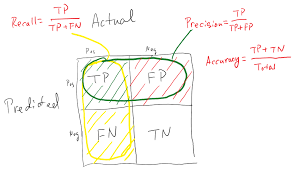

In [ ]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[774  87]
 [230 432]]


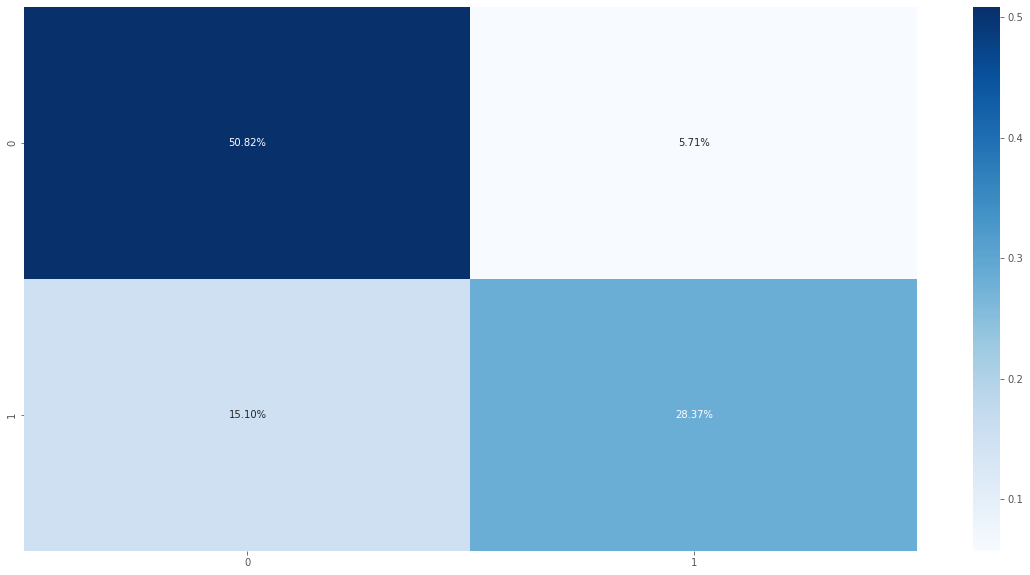

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier().fit(train_features, train_labels)
#predicts = knn.predict((test_features))
#print(classification_report(test_labels, predicts)) 

fitting the test data for submission

In [ ]:
test_vectorizer = tfidf.transform(data_clean_test['text_clean']).toarray()

In [ ]:
test_vectorizer.shape

(3263, 5000)

In [ ]:
final_predictions=mnb_classifier.predict(test_vectorizer)

In [ ]:
final_predictions

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
submission_df = pd.DataFrame()

In [ ]:
submission_df['id'] = data_clean_test['id']
submission_df['target'] = final_predictions
submission_df

,id,target
0,0,1
1,2,0
2,3,0
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [ ]:
submission_df['target'].value_counts()

0    2296
1     967
Name: target, dtype: int64

In [ ]:
submission = submission_df.to_csv('Result.csv',index = False)

if you liked this kernel,please upvote it <3  
ok
